In [1]:
import umap
import hdbscan
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
# Dimension reduction and clustering libraries
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
%matplotlib inline

In [2]:
%cd Z:\PPMI_Data\Excels\NonMotors\The251\Male\GeneCpG\UPSIT
df = pd.read_csv ("UPSIT3Categ_Methylome_Male.csv")
df['APPRDX'] = df['APPRDX'] - 1
print(df.shape)
df.head(2)

Z:\PPMI_Data\Excels\NonMotors\The251\Male\GeneCpG\UPSIT
(307, 5679)


,Sentrix,PATNO,HYS,Gender,APPRDX,UPSIT_3,UPSIT_Total,cg06067658,cg15442538,cg25928446,...,cg05766881,cg01708543,cg10933281,cg04735449,cg15856662,cg11864127,cg14420798,cg08859349,cg01481205,cg19228755
0,200991620021_R01C01,3001,2,1,0,1,25,0.088679,0.890148,0.719238,...,0.748763,0.830052,0.861102,0.855659,0.788271,0.805084,0.729165,0.803183,0.925666,0.849608
1,200973410167_R04C01,3007,2,1,0,2,18,0.128668,0.916448,0.726893,...,0.886279,0.898054,0.896800,0.911732,0.863749,0.893595,0.829444,0.866504,0.917233,0.786606


In [3]:
df1 = df[df.PATNO != 4079]

In [4]:
df_data = df1.drop(['PATNO', 'Sentrix', 'HYS', 'Gender', 'UPSIT_3','UPSIT_Total','APPRDX'], axis=1)
print(df_data.shape)
df_data.head(2)

(307, 5672)


,cg06067658,cg15442538,cg25928446,cg12415575,cg26358225,cg19058526,cg20195763,cg23725394,cg27107076,cg15657055,...,cg05766881,cg01708543,cg10933281,cg04735449,cg15856662,cg11864127,cg14420798,cg08859349,cg01481205,cg19228755
0,0.088679,0.890148,0.719238,0.066678,0.151532,0.133249,0.479724,0.926745,0.538423,0.697562,...,0.748763,0.830052,0.861102,0.855659,0.788271,0.805084,0.729165,0.803183,0.925666,0.849608
1,0.128668,0.916448,0.726893,0.066768,0.198886,0.141136,0.412058,0.876792,0.665097,0.797354,...,0.886279,0.898054,0.896800,0.911732,0.863749,0.893595,0.829444,0.866504,0.917233,0.786606


In [5]:
df_data = df_data.applymap(lambda x: 0 if 0.95 >= x else x)
df_data.head(2)

,cg06067658,cg15442538,cg25928446,cg12415575,cg26358225,cg19058526,cg20195763,cg23725394,cg27107076,cg15657055,...,cg05766881,cg01708543,cg10933281,cg04735449,cg15856662,cg11864127,cg14420798,cg08859349,cg01481205,cg19228755
0,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
1,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0.0,0


In [6]:
df_data.tail(2)

,cg06067658,cg15442538,cg25928446,cg12415575,cg26358225,cg19058526,cg20195763,cg23725394,cg27107076,cg15657055,...,cg05766881,cg01708543,cg10933281,cg04735449,cg15856662,cg11864127,cg14420798,cg08859349,cg01481205,cg19228755
305,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0.0,0
306,0,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0.0,0


In [7]:
df_targets = df1[['APPRDX']]

In [8]:
colors = {0:"#F1746B", 1: "#36C3D1"}

In [9]:
clusterable_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0, n_components=2,random_state=42,).fit_transform(df_data)

In [10]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], marker='o',label='Scatter',markerfacecolor='#F1746B', markersize=30, color='floralwhite'),
                Line2D([0], [0], marker='o',label='Scatter',markerfacecolor='#36C3D1', markersize=30, color='floralwhite')]

C:\Users\system 4\AppData\Local\Temp\ipykernel_11080\899581355.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],


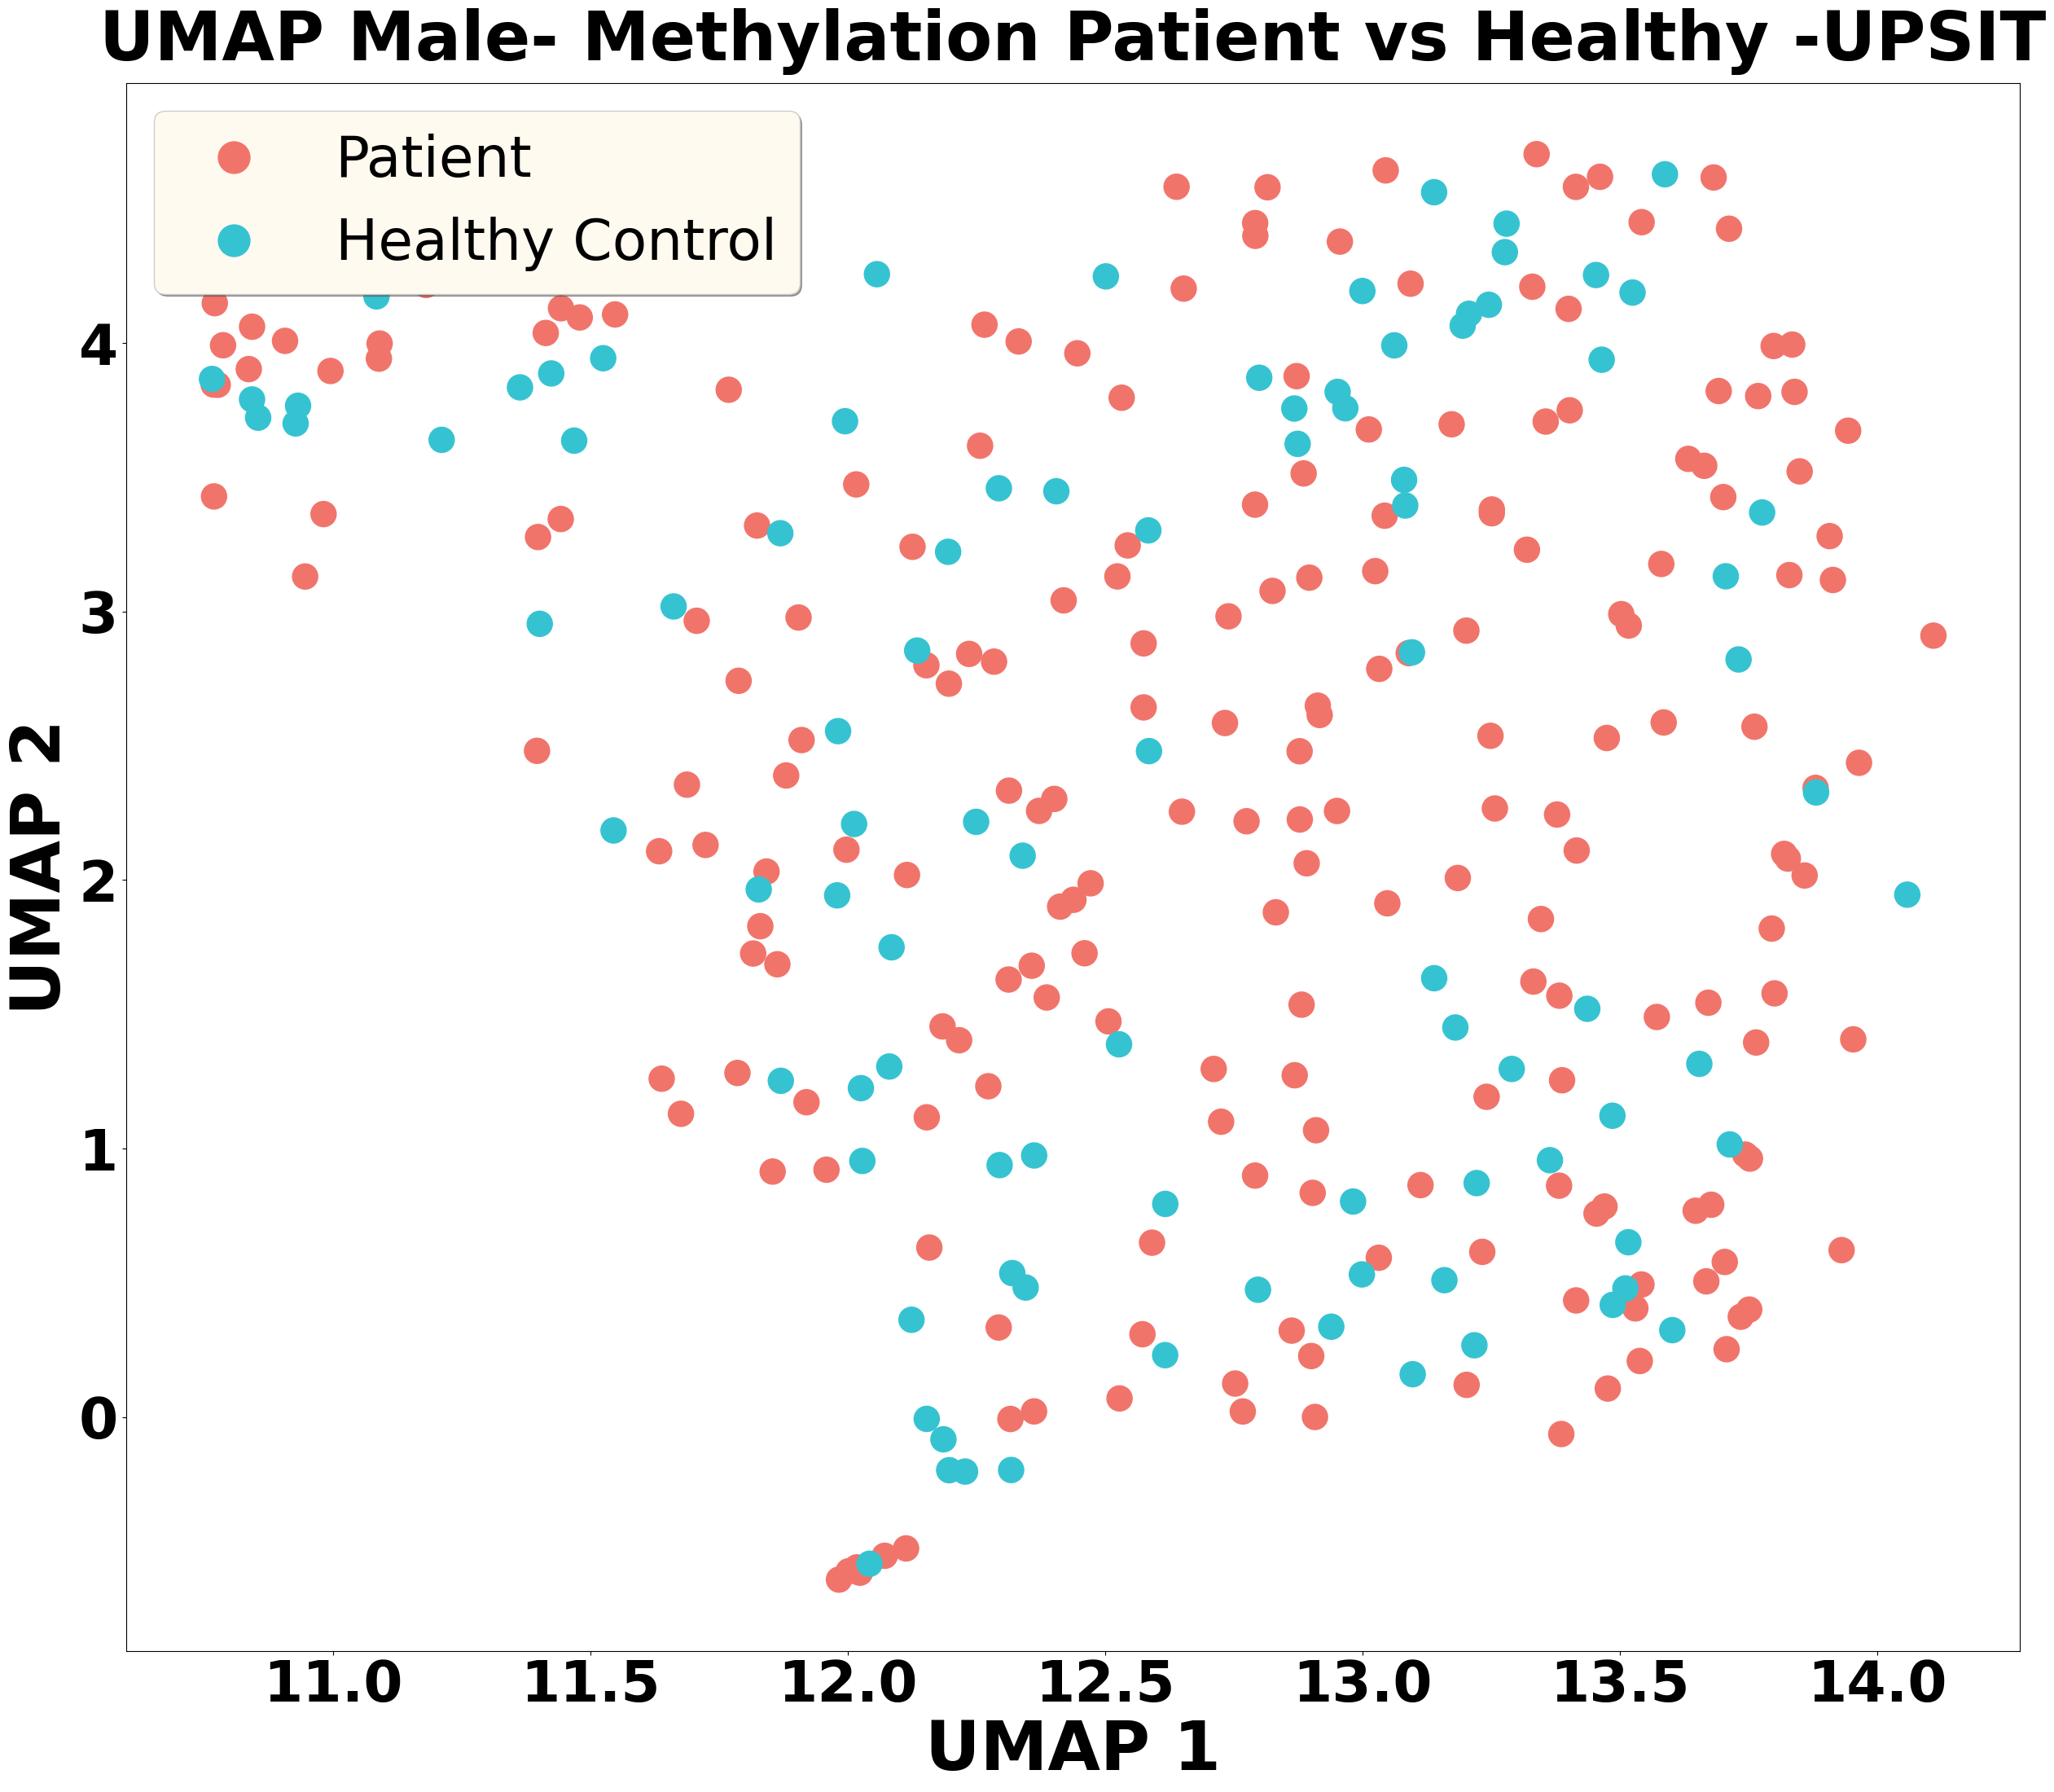

In [12]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
c=df_targets['APPRDX'].map(colors), s=500, cmap="Spectral");
plt.rcParams["figure.figsize"] = [30,25]
plt.xlabel('UMAP 1', fontsize=60, fontweight='bold', color='black')
plt.ylabel('UMAP 2', fontsize=60, fontweight='bold', color='black')
plt.xticks(fontsize=50, fontweight='bold', color='black')
plt.yticks(fontsize=50, fontweight='bold', color='black')
plt.legend(custom_lines, ['Patient', 'Healthy Control'], loc='upper left',shadow = True,
           facecolor = 'floralwhite',prop = {'size' : 50})
plt.title(label= "UMAP Male- Methylation Patient vs Healthy -UPSIT", fontsize=60, fontweight='bold',
          color='black', pad= 20)
plt.savefig("UMAP_CpG_PvsH_95_UPSIT.pdf", format="pdf")
plt.savefig("UMAP_CpG_PvsH_95_UPSIT.svg", format="svg")
plt.show()

In [13]:
# identify columns containing all zeroes
all_zero_cols = [col for col in df_data.columns if df_data[col].sum() == 0]

# drop the identified columns from the dataframe
df_data_0 = df_data.drop(all_zero_cols, axis=1)
print(df_data_0.shape)
df_data_0.head()

(307, 532)


,cg23725394,cg26008260,cg20227471,cg08471319,cg01728682,cg25333900,cg20061882,cg14418176,cg09469318,cg09914207,...,cg22833169,cg13276202,cg09575242,cg01678317,cg27150644,cg17171826,cg02067232,cg00600684,cg13151449,cg01481205
0,0.000000,0.970027,0.000000,0.958174,0.977639,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.964649,0.000000,0.000000,0.981380,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.959199,0.000000,0.000000,0.979969,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.953543,0.973147,0.000000,0.961829,0.978912,0.0,0.0,0.0,0.0,0.951097,...,0.954436,0.952241,0.0,0.000000,0.0,0.963224,0.0,0.0,0.0,0.0
4,0.000000,0.974771,0.960346,0.969214,0.981804,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.965336,0.0,0.000000,0.0,0.0,0.0,0.0


In [14]:
clusterable_embedding = umap.UMAP(n_neighbors=20, min_dist=0.9, n_components=2,random_state=1,).fit_transform(df_data_0)

C:\Users\system 4\AppData\Local\Temp\ipykernel_11080\4054625701.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],


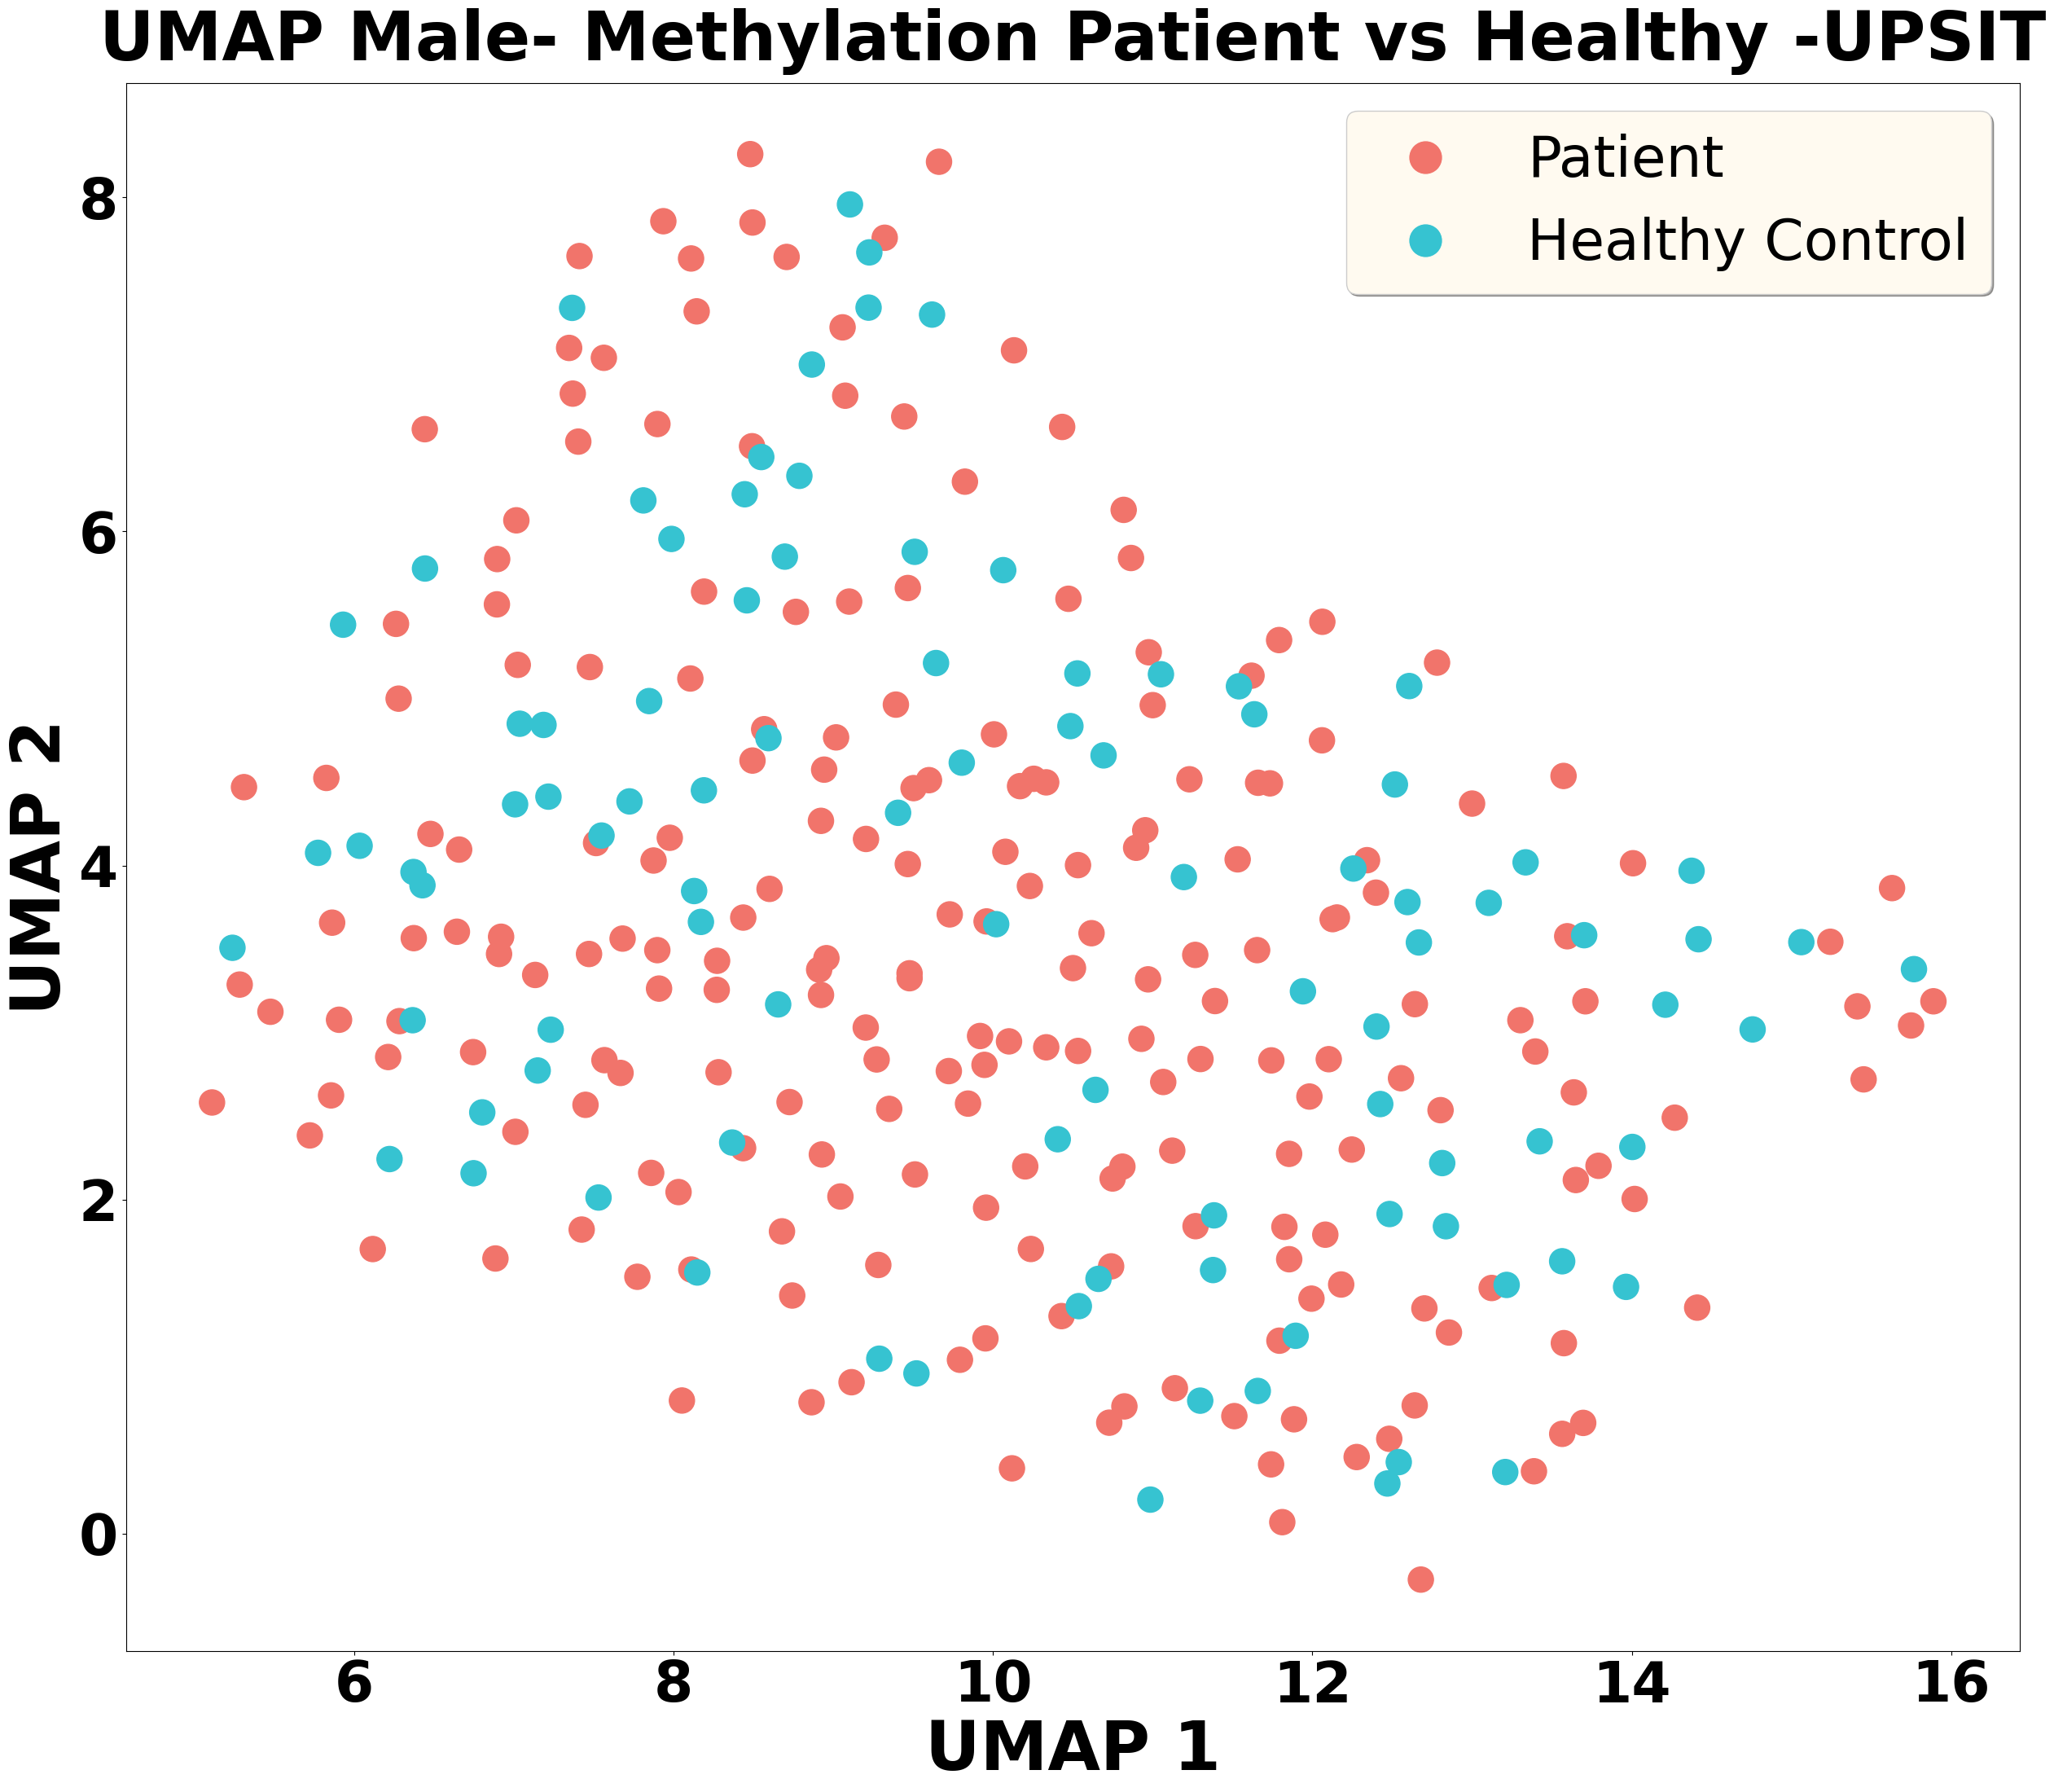

In [16]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
c=df_targets['APPRDX'].map(colors), s=500, cmap="Spectral");
plt.rcParams["figure.figsize"] = [30,25]
plt.xlabel('UMAP 1', fontsize=60, fontweight='bold', color='black')
plt.ylabel('UMAP 2', fontsize=60, fontweight='bold', color='black')
plt.xticks(fontsize=50, fontweight='bold', color='black')
plt.yticks(fontsize=50, fontweight='bold', color='black')
plt.legend(custom_lines, ['Patient', 'Healthy Control'], loc='upper right',shadow = True,
           facecolor = 'floralwhite',prop = {'size' : 50})
plt.title(label= "UMAP Male- Methylation Patient vs Healthy -UPSIT", fontsize=60, fontweight='bold',
          color='black', pad= 20)
plt.savefig("UMAP_CpG_PvsH_95_noZeroUPSIT.pdf", format="pdf")
plt.savefig("UMAP_CpG_PvsH_95_noZeroUPSIT.svg", format="svg")
plt.show()